Симплексный алгоритм: [1.9978997916637335, -2.0002918714906706]
Нельдер-Мид: [1.9803776258664683, -1.9986732989178047]


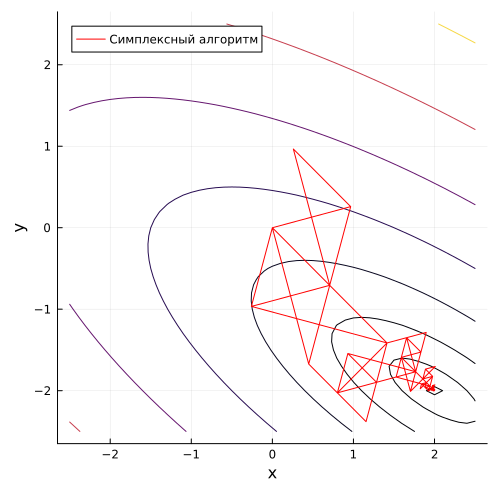

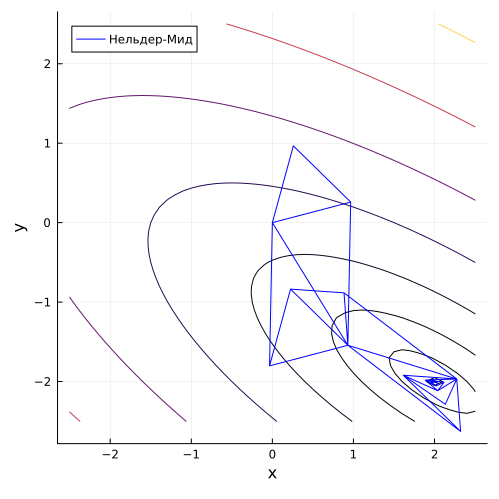

In [2]:
using Plots
using LinearAlgebra

xs = []

function simplex_method(f)
    x1 = [0,0]
    x2 = [(sqrt(3)+1)/(2*sqrt(2)), (sqrt(3)-1)/(2*sqrt(2))]
    x3 = [(sqrt(3)-1)/(2*sqrt(2)), (sqrt(3)+1)/(2*sqrt(2))]
    points = [x1,x2,x3]
    points[1] = x1
    points[2] = x2
    points[3] = x3
    push!(xs, x1)
    push!(xs, x2)
    push!(xs, x3)
    while true
        if(norm(points[1]- points[2])) < 0.001
            return points[1]
        end
        if(f(points[2]) >= f(points[1]) && f(points[2]) >= f(points[3]))
            temp = points[1]
            points[1] = points[2]
            points[2] = temp
        elseif (f(points[3]) >= f(points[1]) && f(points[3]) >= f(points[2]))
            temp = points[1]
            points[1] = points[3]
            points[3] = temp
        end
        x4 = points[2] + points[3] - points[1]
        if(f(x4) >= f(points[2]) && f(x4) >= f(points[3]))
            points[1] = x4
            points[2] = x4+(points[2] - x4)/2
            points[3] = x4+(points[3] - x4)/2
            push!(xs, x4)
            push!(xs, points[2])
            push!(xs, points[3])
        else
            points[1] = x4
            push!(xs, x4)
            push!(xs, points[2])
            push!(xs, points[3])
        end
    end
end

function nelder_meed(f)
    x1 = [0.0,0.0]
    x2 = [(sqrt(3)+1)/(2*sqrt(2)), (sqrt(3)-1)/(2*sqrt(2))]
    x3 = [(sqrt(3)-1)/(2*sqrt(2)), (sqrt(3)+1)/(2*sqrt(2))]
    points = [x1,x2,x3]
    points[1] = x1
    points[2] = x2
    points[3] = x3
    xs = []
    center = [0.0,0.0]
    beta = 2.0
    push!(xs, x1)
    push!(xs, x2)
    push!(xs, x3)
    while true
        points = sort(points, by=x -> f(x), rev=true)
        push!(xs, points[3])
        push!(xs, points[1])
        push!(xs, points[2])
        push!(xs, points[3])
        center = (points[2]+points[3])/2.0
        if (sqrt(((f(points[1]) - f(center))^2 +((f(points[2]) - f(center))^2) + ((f(points[2]) - f(center))^2))/(3.0)) < 0.001)
            return  points[3],xs
        end
        x4 = points[2]+points[3]-points[1]
        beta = 2.0
        y_min =  f(points[3])
        if(f(x4) < y_min)
            beta = 2.0
            x5 = beta*x4 + (1-beta)*center
            if(f(x5)< f(x4) && f(x5)< f(points[3]) && f(x5)< f(points[2]))
                points[1] = x5
            else
                if(f(x5) > f(x4))
                    points[1] = x4
                end
            end
        else
            if f(points[3]) < f(x4) < f(points[2])
                points[1] = x4
            else
                if f(points[2]) < f(x4) < f(points[1])
                    points[1] = x4
                end
                points = sort(points, by=x -> f(x), rev=true)
                beta = 0.5
                x5 = beta * points[1] + (1 - beta) * center
                if f(x5) < f(points[1])
                    points[1] = x5
                else
                    #c
                    points[1] = points[3] + 0.5 * (points[1] - points[3])
                    points[2] = points[3] + 0.5 * (points[2] - points[3])
                end
            end
        end
    end
end

function rosenbrock(x)
    return (1 - x[1])^2 + 100 * (x[2] - x[1]^2)^2
end

function schwefel(x1, x2)
    return 418.9829 * 2 - (x1 * sin(sqrt(abs(x1))) + x2 * sin(sqrt(abs(x2))))
end

function rastrigin(x)
    return 20 + sum(x.^2 .- 10 * cos.(2 * π * x))
end

function f(x)
    return (x[1]+x[2])^2 + (x[2]+2)^2
end

r = simplex_method(f)
println("Симплексный алгоритм: ", r)

x_coords_simplex = [x[1] for x in xs]
y_coords_simplex = [y[2] for y in xs]

res,xs = nelder_meed(f)
println("Нельдер-Мид: ", res)

x_coords_nm = [x[1] for x in xs]
y_coords_nm = [y[2] for y in xs]

x = -2.5:0.1:2.5
y = -2.5:0.1:2.5

levels = []
for i in 1:10
    push!(levels, i^4*0.01)
end

p1 = contour(x, y, (x, y) -> f([x, y]), levels = levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
plot!(p1, x_coords_simplex, y_coords_simplex, label="Симплексный алгоритм", line=:red)

p2 = contour(x, y, (x, y) -> f([x, y]), levels = levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
plot!(p2, x_coords_nm, y_coords_nm, label="Нельдер-Мид", line=:blue)

display(p1)
display(p2)